In [48]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)


In [50]:
"""
Load processed train/test files created in DataPreparation.ipynb
"""
X_train = pd.read_csv("processed/X_train.csv")
X_test  = pd.read_csv("processed/X_test.csv")

y_train = pd.read_csv("processed/y_train.csv").squeeze()
y_test  = pd.read_csv("processed/y_test.csv").squeeze()

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6499, 116), (1625, 116), (6499,), (1625,))

In [52]:
"""
Train Logistic Regression model.
- max_iter is increased to ensure convergence.
- solver='liblinear' is commonly used for binary classification.
"""
lr_model = LogisticRegression(max_iter=1000, solver="liblinear")
lr_model.fit(X_train, y_train)

lr_model


LogisticRegression(max_iter=1000, solver='liblinear')

In [54]:
y_pred = lr_model.predict(X_test)

proba = lr_model.predict_proba(X_test)
p_index = list(lr_model.classes_).index("p")   # get column index for poisonous
y_score = proba[:, p_index]                   # probability of poisonous

y_pred[:10], y_score[:10]


(array(['p', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p'], dtype=object),
 array([9.98625400e-01, 9.99229277e-01, 6.06164001e-05, 9.99956883e-01,
        9.98990661e-01, 3.54398214e-02, 1.12563159e-03, 2.07995935e-05,
        3.39553482e-04, 9.96553276e-01]))

In [56]:
acc = accuracy_score(y_test, y_pred)
acc


0.9993846153846154

In [58]:
print(classification_report(y_test, y_pred, target_names=["Edible (e)", "Poisonous (p)"]))

cm = confusion_matrix(y_test, y_pred, labels=["e", "p"])
cm_df = pd.DataFrame(cm, index=["Actual_e", "Actual_p"], columns=["Pred_e", "Pred_p"])
cm_df


               precision    recall  f1-score   support

   Edible (e)       1.00      1.00      1.00       842
Poisonous (p)       1.00      1.00      1.00       783

     accuracy                           1.00      1625
    macro avg       1.00      1.00      1.00      1625
 weighted avg       1.00      1.00      1.00      1625



,Pred_e,Pred_p
Actual_e,842,0
Actual_p,1,782


In [60]:
"""
Metrics table
Poisonous (p) is treated as the positive class.
"""
roc_auc = roc_auc_score((y_test == "p").astype(int), y_score)

metrics_table = pd.DataFrame({
    "METRIC": ["ACCURACY", "PRECISION (p)", "RECALL (p)", "F1-SCORE (p)", "ROC-AUC"],
    "VALUE": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, pos_label="p"),
        recall_score(y_test, y_pred, pos_label="p"),
        f1_score(y_test, y_pred, pos_label="p"),
        roc_auc
    ]
})
metrics_table["VALUE"] = metrics_table["VALUE"].round(4)
metrics_table



,METRIC,VALUE
0,ACCURACY,0.9994
1,PRECISION (p),1.0000
2,RECALL (p),0.9987
3,F1-SCORE (p),0.9994
4,ROC-AUC,1.0000


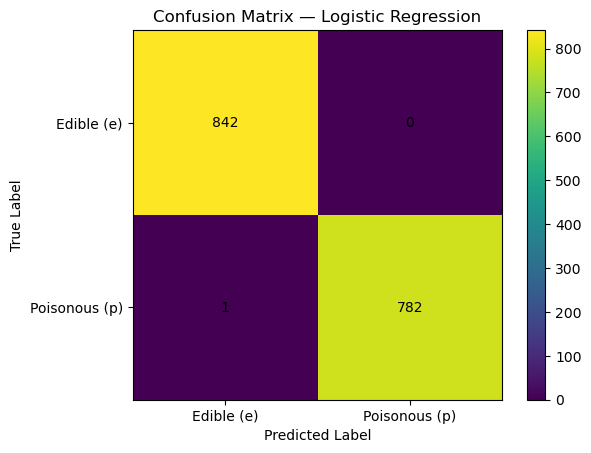

In [62]:
# Confusion Matrix Heatmap 
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation="nearest")
ax.set_title("Confusion Matrix — Logistic Regression")
ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
ax.set_xticklabels(["Edible (e)", "Poisonous (p)"])
ax.set_yticklabels(["Edible (e)", "Poisonous (p)"])
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")

fig.colorbar(im, ax=ax)
plt.show()

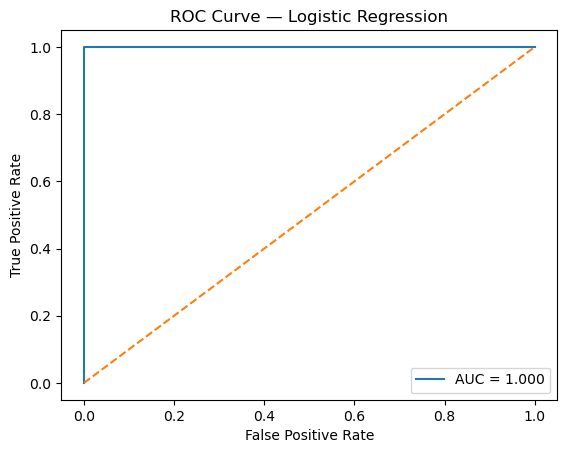

In [64]:
#ROC Curve 
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label="p")
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve — Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

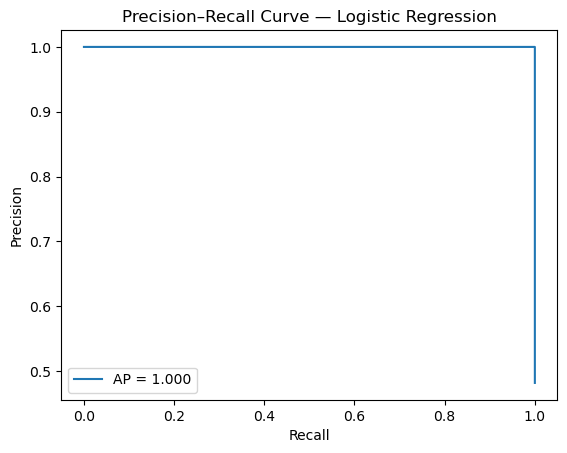

In [66]:
#Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label="p")
ap = average_precision_score((y_test == "p").astype(int), y_score)

plt.figure()
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()